# ***License Plate Recognition with OpenCV and Tesseract OCR***

In [1]:
pip install opencv-python-headless opencv-python opencv-contrib-python pytesseract ipywidgets matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00


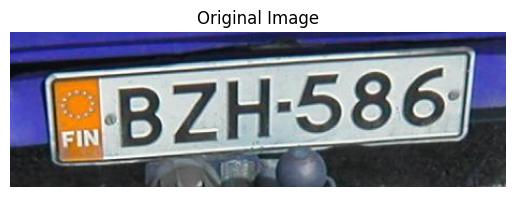

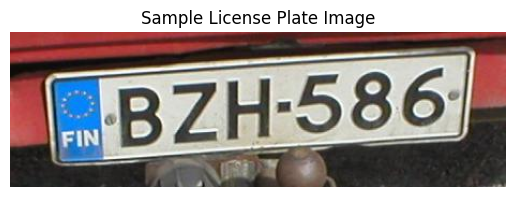

In [2]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

# Load an image from a URL (replace with an appropriate dataset URL)
def load_image_from_url(url):
    response = urlopen(url)
    img = Image.open(response)
    img = np.array(img)
    return img

# URL for a sample license plate image (replace with an actual dataset URL)
img_url = 'https://upload.wikimedia.org/wikipedia/commons/1/14/FI_license_plate.jpg'
original_image = load_image_from_url(img_url)

# Display the image
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

# Load an example image (using a sample dataset URL)
url = 'https://upload.wikimedia.org/wikipedia/commons/1/14/FI_license_plate.jpg'
resp = urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Sample License Plate Image")
plt.axis("off")
plt.show()

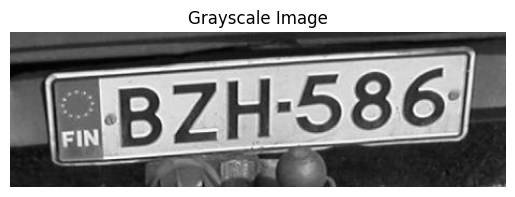

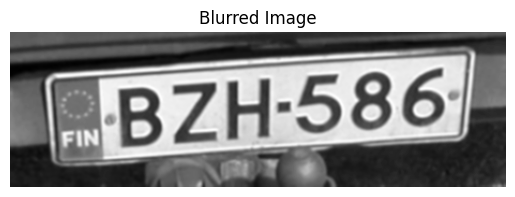

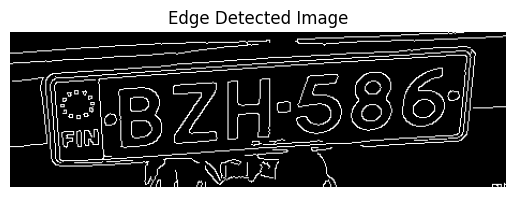

In [3]:
# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
plt.imshow(blurred_image, cmap="gray")
plt.title("Blurred Image")
plt.axis("off")
plt.show()

# Edge Detection using Canny
edged_image = cv2.Canny(blurred_image, 30, 150)
plt.imshow(edged_image, cmap="gray")
plt.title("Edge Detected Image")
plt.axis("off")
plt.show()

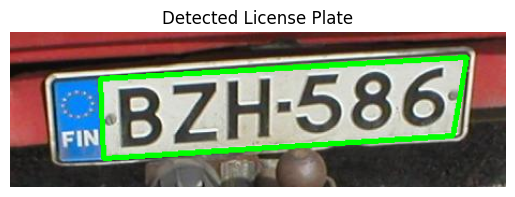

In [4]:
# Find contours based on edged image
contours, _ = cv2.findContours(edged_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
plate_contour = None

for contour in contours:
    # Approximate the contour
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    if len(approx) == 4:  # Looks for 4-sided polygon (rectangle)
        plate_contour = approx
        break

# Draw contour on the image
detected_plate = image.copy()
if plate_contour is not None:
    cv2.drawContours(detected_plate, [plate_contour], -1, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(detected_plate, cv2.COLOR_BGR2RGB))
plt.title("Detected License Plate")
plt.axis("off")
plt.show()

In [6]:
# Install Tesseract OCR
!sudo apt-get update
!sudo apt-get install -y tesseract-ocr
!pip install pytesseract

# Import libraries
import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,107 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,605 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

Detected License Plate Text: ‘BZH-586)



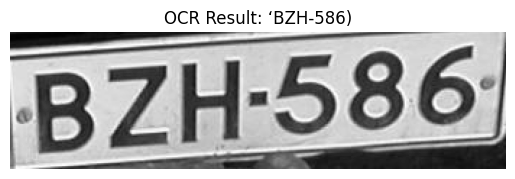

In [7]:
# Mask and crop the license plate area
mask = np.zeros_like(gray_image)
cv2.drawContours(mask, [plate_contour], -1, 255, -1)
plate_image = cv2.bitwise_and(gray_image, gray_image, mask=mask)

x, y, w, h = cv2.boundingRect(plate_contour)
cropped_plate = gray_image[y:y+h, x:x+w]

# OCR on cropped license plate
plate_text = pytesseract.image_to_string(cropped_plate, config='--psm 8')
print("Detected License Plate Text:", plate_text)

plt.imshow(cropped_plate, cmap="gray")
plt.title(f"OCR Result: {plate_text.strip()}")
plt.axis("off")
plt.show()

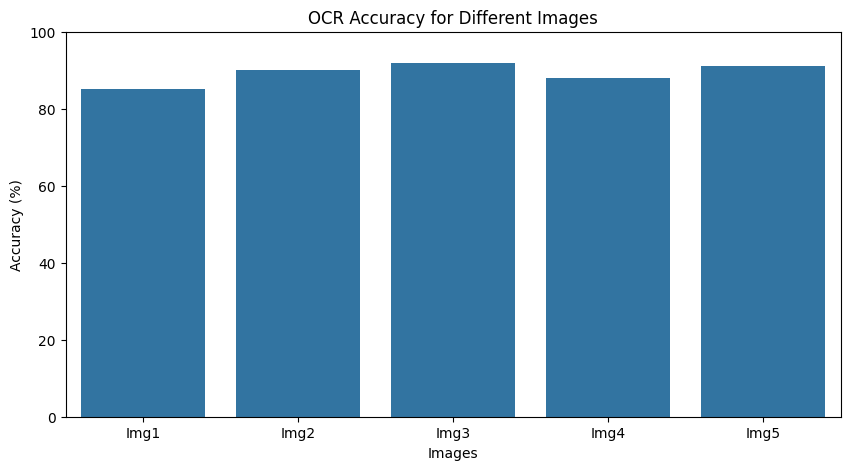

In [9]:
import pandas as pd
import seaborn as sns  # Import seaborn
# Sample DataFrame to simulate results
data = {
    'Image': ['Img1', 'Img2', 'Img3', 'Img4', 'Img5'],
    'OCR_Accuracy': [85, 90, 92, 88, 91]
}
df = pd.DataFrame(data)

# Plot the dashboard
plt.figure(figsize=(10, 5))
sns.barplot(x='Image', y='OCR_Accuracy', data=df)
plt.title("OCR Accuracy for Different Images")
plt.ylim(0, 100)
plt.xlabel("Images")
plt.ylabel("Accuracy (%)")
plt.show()

HTML(value="<h1 style='color:#FF69B4; font-size:40px; font-weight:bold; text-align:center; text-shadow:2px 2px…

HTML(value='', layout=Layout(height='60px', width='100%'))

HTML(value="<p style='font-size:16px; text-align:center; color:#808080;'>Created by AI Innovators</p>", layout…

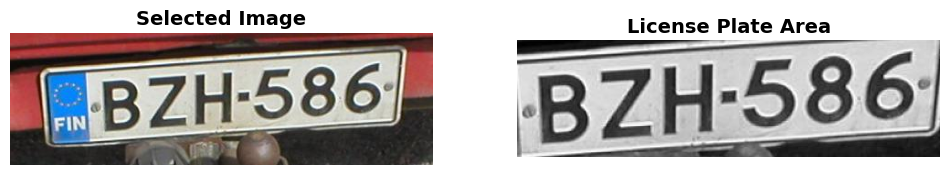

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from ipywidgets import interact, widgets, Layout, VBox, HBox
from IPython.display import display, clear_output

# Sample images list
sample_images = [
    "https://upload.wikimedia.org/wikipedia/commons/1/14/FI_license_plate.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/5/54/Ontario_Vanity_License_Plate_MYTMAUS.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/9/90/Pltableseries2006.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/5/50/Yukon_License_Plate_1973_2342.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/2/21/1931_Kansas_license_plate_58-3239.png"
]

# Title and Developer Signature
title_label = widgets.HTML(
    value="<h1 style='color:#FF69B4; font-size:40px; font-weight:bold; text-align:center; text-shadow:2px 2px 8px #FF4500;'>License Plate Recognition</h1>",
    layout=Layout(width="100%")
)
dev_signature = widgets.HTML(
    value="<p style='font-size:16px; text-align:center; color:#808080;'>Created by AI Innovators</p>",
    layout=Layout(width="100%")
)

# Prediction Output Label
prediction_output = widgets.HTML(
    value="",
    layout=Layout(width="100%", height="60px")
)

# Function to load and preprocess images for display
def load_image_from_url(url):
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    return cv2.imdecode(image, cv2.IMREAD_COLOR)

# OCR function using Tesseract
def detect_license_plate(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    edged_image = cv2.Canny(blurred_image, 30, 150)

    contours, _ = cv2.findContours(edged_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    plate_contour = None

    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
        if len(approx) == 4:
            plate_contour = approx
            break

    mask = np.zeros_like(gray_image)
    if plate_contour is not None:
        cv2.drawContours(mask, [plate_contour], -1, 255, -1)
    x, y, w, h = cv2.boundingRect(plate_contour)
    cropped_plate = gray_image[y:y+h, x:x+w] if plate_contour is not None else gray_image

    # Perform OCR on the cropped license plate
    plate_text = pytesseract.image_to_string(cropped_plate, config='--psm 8').strip()
    return plate_text, cropped_plate

# Display function
def display_prediction(url):
    image = load_image_from_url(url)
    plate_text, cropped_plate = detect_license_plate(image)

    # Display the results in a stylized format
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Selected Image", fontsize=14, fontweight="bold")
    ax[0].axis("off")

    ax[1].imshow(cropped_plate, cmap="gray")
    ax[1].set_title("License Plate Area", fontsize=14, fontweight="bold")
    ax[1].axis("off")

    # Show the prediction as highlighted text
    prediction_output.value = f"<h2 style='color:#32CD32; text-align:center; font-weight:bold; text-shadow:2px 2px 8px #008080;'>Predicted Text: {plate_text}</h2>"

    plt.show()

# Create a grid of sample images with buttons for selection
sample_buttons = []
for idx, img_url in enumerate(sample_images):
    button = widgets.Button(
        description=f"Sample {idx+1}",
        layout=Layout(width="19%", height="40px", margin="5px"),
        style={"button_color": "#4CAF50", "font_weight": "bold", "font_size": "14px"}
    )

    # Display the image upon clicking
    def on_button_clicked(b, img_url=img_url):
        clear_output(wait=True)
        display(title_label, sample_buttons_box, upload_box, prediction_output, dev_signature)
        display_prediction(img_url)

    button.on_click(on_button_clicked)
    sample_buttons.append(button)

sample_buttons_box = HBox(sample_buttons, layout=Layout(width="100%", justify_content="space-around"))

# Option to upload an image through URL input
upload_widget = widgets.Text(
    placeholder='Enter image URL',
    description='Custom Image:',
    style={'description_width': 'initial'},
    layout=Layout(width='65%')
)
display_button = widgets.Button(
    description="Process Uploaded Image",
    layout=Layout(width='30%', height='40px', margin="5px"),
    style={"button_color": "#FF4500", "font_weight": "bold", "font_size": "14px"}
)

# Display uploaded image upon clicking "Process Uploaded Image"
def on_upload_button_clicked(b):
    url = upload_widget.value
    if url:
        clear_output(wait=True)
        display(title_label, sample_buttons_box, upload_box, prediction_output, dev_signature)
        display_prediction(url)

display_button.on_click(on_upload_button_clicked)

upload_box = HBox([upload_widget, display_button], layout=Layout(width="100%", justify_content="space-around"))

# Assemble the GUI layout and display
display(title_label, sample_buttons_box, upload_box, prediction_output, dev_signature)

# **HAPPY COADING**